<a href="https://colab.research.google.com/github/gongx030/seatac_manuscript/blob/main/Etv2_MEF_EB_Etv2_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examining nucleosomal changes of Etv2 motifs in Etv2 induced reprogramming and ES/EB differentiation


In [ ]:
start_time <- Sys.time()

### Install external packages

In [ ]:
system('apt-get -q install libgsl-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

In [ ]:
system('apt-get install libcairo2-dev', intern = TRUE) # required by R package ComplexHeatmap 

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

In [ ]:
system('apt-get install libmagick++-dev', intern = TRUE) # required by magick
system('apt-get install libmagick-dev', intern = TRUE) # for magick

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
  [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
  [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
  [5] "  fonts-droid-fallback fonts-noto-mono ghostscript gir1.2-freedesktop"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
  [6] "  gir1.2-gdkpixbuf-2.0 gir1.2-rsvg-2.0 gsfonts imagemagick-6-common"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
  [7] "  libcupsfilters1 libcupsimage2 libdjvulibre-dev libdjvulibre-text"                                              

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following packages were automatically installed and are no longer required:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
 [5] "  gir1.2-freedesktop gir1.2-gdkpixbuf-2.0 gir1.2-rsvg-2.0 imagemagick-6-common"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "  libdjvulibre-dev libdjvulibre-text libdjvulibre21 libgdk-pixbuf2.0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [7] "  liblqr-1-0 liblqr-1-0-dev libmagick++-6-headers libmagick++-6.q16-7"                                                 

### Install R packages

In [ ]:
install.packages('BiocManager')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
required_packages <- c(
  'devtools', 
  'dplyr',
  'BSgenome.Mmusculus.UCSC.mm10', 'TxDb.Mmusculus.UCSC.mm10.knownGene', 'org.Mm.eg.db',
  'magick', 'patchwork', 'ggrepel',
  'chromVAR', 'motifmatchr',
  'EnrichedHeatmap', 'circlize', 
  'ChIPseeker', 'clusterProfiler'
)

In [ ]:
missing_packages <- required_packages[!required_packages %in% rownames(installed.packages())]
if (length(missing_packages) > 0){
    BiocManager::install(missing_packages)
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.3 (2022-03-10)

Installing package(s) 'BiocVersion', 'BSgenome.Mmusculus.UCSC.mm10',
  'TxDb.Mmusculus.UCSC.mm10.knownGene', 'org.Mm.eg.db', 'magick', 'patchwork',
  'ggrepel', 'chromVAR', 'motifmatchr', 'EnrichedHeatmap', 'circlize',
  'ChIPseeker', 'clusterProfiler'

also installing the dependencies ‘filelock’, ‘formatR’, ‘pracma’, ‘R.oo’, ‘R.methodsS3’, ‘gridGraphics’, ‘tweenr’, ‘polyclip’, ‘plogr’, ‘BiocFileCache’, ‘lambda.r’, ‘futile.options’, ‘poweRlaw’, ‘annotate’, ‘R.utils’, ‘iterators’, ‘ggfun’, ‘ggplotify’, ‘ggforce’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’, ‘ape’, ‘tidytree’, ‘treeio’, ‘gridExtra’, ‘fastmatch’, ‘XVector’, ‘RSQLite’, ‘RCurl’, ‘BiocIO’, ‘biomaRt’, ‘Biobase’, ‘KEGGREST’, ‘GenomeInfoDbData’, ‘RcppEigen’, ‘BH’, ‘futile.logger’, ‘snow’, ‘caTools’, ‘CNE

In [ ]:
library(devtools)

Loading required package: usethis



### Install SeATAC from github

In [ ]:
install_github('gongx030/seatac@v0.4.0', force = TRUE, quiet = FALSE)
reload(pkgload::inst("seatac"))
library(seatac)

crayon       (1.5.0 -> 1.5.1 ) [CRAN]
fansi        (1.0.2 -> 1.0.3 ) [CRAN]
tfautograph  (NA    -> 0.3.2 ) [CRAN]
processx     (3.5.2 -> 3.5.3 ) [CRAN]
config       (NA    -> 0.3.1 ) [CRAN]
here         (NA    -> 1.0.1 ) [CRAN]
RcppTOML     (NA    -> 0.1.7 ) [CRAN]
zeallot      (NA    -> 0.1.0 ) [CRAN]
tfruns       (NA    -> 1.5.0 ) [CRAN]
tensorflow   (NA    -> 2.8.0 ) [CRAN]
reticulate   (NA    -> 1.24  ) [CRAN]
keras        (NA    -> 2.8.0 ) [CRAN]
abind        (NA    -> 1.4-5 ) [CRAN]
tfdatasets   (NA    -> 2.7.0 ) [CRAN]
tfprobabi... (NA    -> 0.15.0) [CRAN]


Installing 15 packages: crayon, fansi, tfautograph, processx, config, here, RcppTOML, zeallot, tfruns, tensorflow, reticulate, keras, abind, tfdatasets, tfprobability

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpXwIGFa/remotes605b30adcb/gongx030-seatac-55f9f36/DESCRIPTION’ ... OK
* preparing ‘seatac’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘seatac_0.4.0-010.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: tensorflow

Loading required package: tfprobability

Loading required package: tfdatasets

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘pa

### Install other non-CRAN packages

In [ ]:
devtools::install_github("GreenleafLab/chromVARmotifs")

tzdb (0.2.0 -> 0.3.0) [CRAN]


Installing 1 packages: tzdb

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpXwIGFa/remotes60322f27ca/GreenleafLab-chromVARmotifs-38bed55/DESCRIPTION’ ... OK
* preparing ‘chromVARmotifs’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘chromVARmotifs_0.2.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Load R packages

In [ ]:
library(GenomicRanges)
library(BSgenome.Mmusculus.UCSC.mm10)
library(dplyr)
library(ggplot2)
library(magick)
library(patchwork)
library(chromVAR)
library(motifmatchr)
library(chromVARmotifs)
library(ggrepel)
library(circlize)
library(EnrichedHeatmap)
library(TxDb.Mmusculus.UCSC.mm10.knownGene)
library(org.Mm.eg.db)
library(ChIPseeker)
library(clusterProfiler)
library(RColorBrewer)

Loading required package: BSgenome

Loading required package: Biostrings

Loading required package: XVector


Attaching package: ‘Biostrings’


The following object is masked from ‘package:base’:

    strsplit


Loading required package: rtracklayer


Attaching package: ‘dplyr’


The following objects are masked from ‘package:Biostrings’:

    collapse, intersect, setdiff, setequal, union


The following object is masked from ‘package:XVector’:

    slice


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, u

### TensorFlow setup

In [ ]:
gpus <- tf$config$list_physical_devices('GPU')
for (gpu in gpus){
  tf$config$experimental$set_memory_growth(gpu, TRUE)
}
logical_gpus <- tf$config$experimental$list_logical_devices('GPU')
sprintf('Physical GPUs: %d', length(gpus)) %>% message()
sprintf('Logical GPUs: %d', length(logical_gpus)) %>% message()

Loaded Tensorflow version 2.8.0

Physical GPUs: 1

Logical GPUs: 1



In [ ]:
Sys.time() - start_time

Time difference of 36.52544 mins

## Parameters

In [ ]:
ARGS <- list(
  bin_size = 5L,
  fragment_size_range_max = 640L,
  fragment_size_interval = 10L,
  window_size = 1000L,
  heatmap_window_size = 2000L,
  block_size = 640L,
  sliding_step = 20L,
  min_reads = 5L,
  step_size = 200L,

  vae_num_peaks = 5000L,
  vae_latent = c(10L),
  vae_filters0 = c(128L),
  vae_filters = c(32L),
  vae_downsample_layers = 4L,
  vae_upsample_layers = 4L,
  vae_base_learning_rate = c(1e-2),
  vae_epochs = 200L,
  vae_beta_schedule_method = c('constant'),
  vae_beta0 = 1,
  vae_batch_size = c(128L),
  vae_warmup_ratio = 0.1,

  target_width = 100L,
  min_test_reads = 1L,
  max_test_reads = 10L,
  center_width = 100L # the center width
)

## Load BAM files

In [ ]:
remote_bam_files <- c(
  EB_NoDox_D25 = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_NoDox_D25.bam',
  EB_Dox_D25_Flk1pos = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_Dox_D25_Flk1pos.bam',
  MEF_NoDox = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_NoDox.bam',
  MEF_Dox_D7_Flk1pos = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D7_Flk1pos.bam'
)
for (i in 1:length(remote_bam_files)){
  sprintf('wget -cx %s', remote_bam_files[i]) %>% system()
}

In [ ]:
local_bam_files <- gsub('https://', './', remote_bam_files)
all(file.exists(local_bam_files))

[1] TRUE

## Load bed files

In [ ]:
remote_bed_files <- gsub('.bam', '_summits.bed', remote_bam_files)
for (i in 1:length(remote_bed_files)){
  sprintf('wget -cx %s', remote_bed_files[i]) %>% system()
}
local_bed_files <- gsub('https://', './', remote_bed_files)
all(file.exists(local_bed_files))

[1] TRUE

## Training VAE

In [ ]:
models <- list()

### Training VAE for EB

In [ ]:
cond <- c('EB_NoDox_D25', 'EB_Dox_D25_Flk1pos')

In [ ]:
gr0_EB <- lapply(local_bed_files[cond], function(bed_file){
  peaks <- read.table(bed_file, header = FALSE, sep = '\t')
  peaks <- GRanges(seqnames = peaks[, 1], range = IRanges(start = peaks[, 2], end = peaks[, 3]))
  peaks <- resize(peaks, fix = 'center', width = ARGS[['step_size']])
  peaks
}) %>%
  GRangesList() %>%
  coverage() %>%
  IRanges::slice(lower = 1, rangesOnly = TRUE) %>%
  GRanges() %>%
  resize(fix = 'center', width = ARGS[['window_size']])
gr0_EB <- gr0_EB[!seqnames(gr0_EB) %in% c('chrM', 'chrY')]

In [ ]:
gr <- slidingWindows(gr0_EB, width = ARGS[['block_size']], step = ARGS[['sliding_step']]) %>% unlist()
set.seed(1L); gr <- sample(gr, ARGS[['vae_num_peaks']])
counts <- count_reads(gr, local_bam_files[cond], genome = BSgenome.Mmusculus.UCSC.mm10,  fragment_size_range = c(0, ARGS[['fragment_size_range_max']]))

validate_bam | indexing bam files: ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_NoDox_D25.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_NoDox_D25.bam

validate_bam | indexing bam files: ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_Dox_D25_Flk1pos.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_Dox_D25_Flk1pos.bam



In [ ]:
valid <- rowSums(counts >= ARGS[['min_reads']]) == length(cond)
gr <- gr[valid]
sprintf('number of training peaks for VaeModel: %d', length(gr)) %>% message()

number of training peaks for VaeModel: 4917



In [ ]:
x <- read_vplot(
  gr, 
  filenames = local_bam_files[cond], 
  genome = BSgenome.Mmusculus.UCSC.mm10, 
  bin_size = ARGS[['bin_size']], 
  fragment_size_range = c(0, ARGS[['fragment_size_range_max']]), 
  fragment_size_interval = ARGS[['fragment_size_interval']]
)

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_NoDox_D25.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_Dox_D25_Flk1pos.bam



In [ ]:
model <- new('VaeModel', model = VaeModel(
  n_samples = dim(x)['sample'],
  latent_dim = ARGS[['vae_latent']],
  block_size = ARGS[['block_size']],
  bin_size = ARGS[['bin_size']],
  filters0 = ARGS[['vae_filters0']],
  filters = ARGS[['vae_filters']],
  upsample_layers = ARGS[['vae_upsample_layers']],
  downsample_layers = ARGS[['vae_downsample_layers']],
  fragment_size_range  = c(0, ARGS[['fragment_size_range_max']]),
  fragment_size_interval = ARGS[['fragment_size_interval']]
))
lr <- WarmUpAndCosineDecay(
  base_learning_rate = ARGS[['vae_base_learning_rate']],
  num_examples = nrow(x),
  batch_size = ARGS[['vae_batch_size']],
  epochs = ARGS[['vae_epochs']],
  warmup_epochs = as.integer(ARGS[['vae_epochs']] * ARGS[['vae_warmup_ratio']])
)
beta <- beta_schedule(
  method = ARGS[['vae_beta_schedule_method']],
  beta0 = ARGS[['vae_beta0']],
  epochs = ARGS[['vae_epochs']]
)
d <- model %>% prepare_data(x)
d <- d %>% tensor_slices_dataset()
models[['EB']] <- model %>% fit(d, batch_size =  ARGS[['vae_batch_size']], epochs = ARGS[['vae_epochs']], learning_rate = lr, compile = TRUE, beta = beta)

epoch=     1/   200 | beta=1.000e+00 | loss= 6465.7184996 | loss_reconstruction= 6464.6559495 | loss_kl=    1.0625420

epoch=     2/   200 | beta=1.000e+00 | loss= 5455.7331731 | loss_reconstruction= 5450.8868940 | loss_kl=    4.8462986

epoch=     3/   200 | beta=1.000e+00 | loss= 4838.3816857 | loss_reconstruction= 4835.4382387 | loss_kl=    2.9434417

epoch=     4/   200 | beta=1.000e+00 | loss= 3948.0273876 | loss_reconstruction= 3946.6457269 | loss_kl=    1.3816941

epoch=     5/   200 | beta=1.000e+00 | loss= 2732.7135667 | loss_reconstruction= 2732.4355218 | loss_kl=    0.2780376

epoch=     6/   200 | beta=1.000e+00 | loss= 1587.7711964 | loss_reconstruction= 1587.6957225 | loss_kl=    0.0754664

epoch=     7/   200 | beta=1.000e+00 | loss=  903.7316143 | loss_reconstruction=  903.6403402 | loss_kl=    0.0912771

epoch=     8/   200 | beta=1.000e+00 | loss=  601.4001762 | loss_reconstruction=  601.1533954 | loss_kl=    0.2467813

epoch=     9/   200 | beta=1.000e+00 | loss=  47

### Training VAE for MEF

In [ ]:
cond <- c('MEF_NoDox', 'MEF_Dox_D7_Flk1pos')

In [ ]:
gr0_MEF <- lapply(local_bed_files[cond], function(bed_file){
  peaks <- read.table(bed_file, header = FALSE, sep = '\t')
  peaks <- GRanges(seqnames = peaks[, 1], range = IRanges(start = peaks[, 2], end = peaks[, 3]))
  peaks <- resize(peaks, fix = 'center', width = ARGS[['step_size']])
  peaks
}) %>%
  GRangesList() %>%
  coverage() %>%
  IRanges::slice(lower = 1, rangesOnly = TRUE) %>%
  GRanges() %>%
  resize(fix = 'center', width = ARGS[['window_size']])
gr0_MEF <- gr0_MEF[!seqnames(gr0_MEF) %in% c('chrM', 'chrY')]

In [ ]:
gr <- slidingWindows(gr0_MEF, width = ARGS[['block_size']], step = ARGS[['sliding_step']]) %>% unlist()
set.seed(1L); gr <- sample(gr, ARGS[['vae_num_peaks']])
counts <- count_reads(gr, local_bam_files[cond], genome = BSgenome.Mmusculus.UCSC.mm10,  fragment_size_range = c(0, ARGS[['fragment_size_range_max']]))

validate_bam | indexing bam files: ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_NoDox.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_NoDox.bam

validate_bam | indexing bam files: ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D7_Flk1pos.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D7_Flk1pos.bam



In [ ]:
valid <- rowSums(counts >= ARGS[['min_reads']]) == length(cond)
gr <- gr[valid]
sprintf('number of training peaks for VaeModel: %d', length(gr)) %>% message()

number of training peaks for VaeModel: 4932



In [ ]:
x <- read_vplot(
  gr, 
  filenames = local_bam_files[cond], 
  genome = BSgenome.Mmusculus.UCSC.mm10, 
  bin_size = ARGS[['bin_size']], 
  fragment_size_range = c(0, ARGS[['fragment_size_range_max']]), 
  fragment_size_interval = ARGS[['fragment_size_interval']]
)

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_NoDox.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D7_Flk1pos.bam



In [ ]:
model <- new('VaeModel', model = VaeModel(
  n_samples = dim(x)['sample'],
  latent_dim = ARGS[['vae_latent']],
  block_size = ARGS[['block_size']],
  bin_size = ARGS[['bin_size']],
  filters0 = ARGS[['vae_filters0']],
  filters = ARGS[['vae_filters']],
  upsample_layers = ARGS[['vae_upsample_layers']],
  downsample_layers = ARGS[['vae_downsample_layers']],
  fragment_size_range  = c(0, ARGS[['fragment_size_range_max']]),
  fragment_size_interval = ARGS[['fragment_size_interval']]
))
lr <- WarmUpAndCosineDecay(
  base_learning_rate = ARGS[['vae_base_learning_rate']],
  num_examples = nrow(x),
  batch_size = ARGS[['vae_batch_size']],
  epochs = ARGS[['vae_epochs']],
  warmup_epochs = as.integer(ARGS[['vae_epochs']] * ARGS[['vae_warmup_ratio']])
)
beta <- beta_schedule(
  method = ARGS[['vae_beta_schedule_method']],
  beta0 = ARGS[['vae_beta0']],
  epochs = ARGS[['vae_epochs']]
)
d <- model %>% prepare_data(x)
d <- d %>% tensor_slices_dataset()
models[['MEF']] <- model %>% fit(d, batch_size =  ARGS[['vae_batch_size']], epochs = ARGS[['vae_epochs']], learning_rate = lr, compile = TRUE, beta = beta)

epoch=     1/   200 | beta=1.000e+00 | loss= 6323.5697992 | loss_reconstruction= 6322.5179662 | loss_kl=    1.0518059

epoch=     2/   200 | beta=1.000e+00 | loss= 5488.9260817 | loss_reconstruction= 5486.8154923 | loss_kl=    2.1105795

epoch=     3/   200 | beta=1.000e+00 | loss= 4955.4550406 | loss_reconstruction= 4954.1873998 | loss_kl=    1.2676322

epoch=     4/   200 | beta=1.000e+00 | loss= 4094.0005947 | loss_reconstruction= 4093.7140988 | loss_kl=    0.2864797

epoch=     5/   200 | beta=1.000e+00 | loss= 2811.0188113 | loss_reconstruction= 2810.9685747 | loss_kl=    0.0502384

epoch=     6/   200 | beta=1.000e+00 | loss= 1566.6657245 | loss_reconstruction= 1566.6383088 | loss_kl=    0.0274133

epoch=     7/   200 | beta=1.000e+00 | loss=  841.6711222 | loss_reconstruction=  841.6445219 | loss_kl=    0.0266039

epoch=     8/   200 | beta=1.000e+00 | loss=  534.8268988 | loss_reconstruction=  534.7174151 | loss_kl=    0.1094864

epoch=     9/   200 | beta=1.000e+00 | loss=  40

## Download related `pileup` and `fold enrichment` bigwig files

In [ ]:
remote_bw_files <- c(
	'MEF_Dox_D1_Etv2' 									= 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/MEF_Dox_d1_Etv2_FE.bw',
#	'MEF_Dox_D2_Etv2' 									= 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/MEF_Dox_d2_Etv2_FE.bw',
	'MEF_Dox_D7_Etv2' 									= 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/MEF_Dox_d7_Etv2_FE.bw',
	'MEF_NoDox_Brg1' 										= 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/MEF_NoDox_d0_Brg1_FE.bw',
	'MEF_Dox_D1_Brg1' 									= 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/MEF_Dox_d1_Brg1_FE.bw',
#	'MEF_Dox_D2_Brg1' 									= 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/MEF_Dox_d2_Brg1_FE.bw',
	'MEF_Dox_D7_Brg1' 									= 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/MEF_Dox_d7_Brg1_FE.bw',
  'MEF_NoDox_H3K27ac' 								= 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/MEF_NoDox_d0_H3K27ac_FE.bw',
  'MEF_Dox_D1_H3K27ac' 								= 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/MEF_Dox_d1_H3K27ac_FE.bw',
 # 'MEF_Dox_D2_H3K27ac' 								= 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/MEF_Dox_d2_H3K27ac_FE.bw',
  'MEF_Dox_D7_H3K27ac' 								= 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/MEF_Dox_d7_H3K27ac_FE.bw',
	'MNase'                             = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Chronis_version=20170519a/MNase_treat_pileup.bw',
	'H3'                                = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Chronis_version=20170519a/H3_treat_pileup.bw',
	'H3K9me3'                           = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Chronis_version=20170519a/H3K9me3_treat_pileup.bw',
	'H3K27me3'                          = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Chronis_version=20170519a/H3K27me3_treat_pileup.bw',
	'H3K36me3'                          = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Chronis_version=20170519a/H3K36me3_treat_pileup.bw',
	'H3K9ac'                            = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Chronis_version=20170519a/H3K9ac_treat_pileup.bw',
	'H3K79me2'                          = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Chronis_version=20170519a/H3K79me2_treat_pileup.bw',
	'H3K4me2'                           = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Chronis_version=20170519a/H3K4me2_treat_pileup.bw',
	'H3K4me1'                           = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Chronis_version=20170519a/H3K4me1_treat_pileup.bw',
	'Hdac1'                             = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Chronis_version=20170519a/Hdac1_treat_pileup.bw',
	'H3.3'                              = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Chronis_version=20170519a/H3.3_treat_pileup.bw',
	'P300'                              = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Chronis_version=20170519a/P300_treat_pileup.bw',
	'EB_Dox_3h_Etv2' 					= 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/EB_Dox_3h_Etv2_FE.bw',
	'EB_Dox_12h_Etv2' 					= 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/EB_Dox_12h_Etv2_FE.bw',
	'EB_Dox_3h_Brg1' =  'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/EB_Dox_3h_Brg1_FE.bw',
	'EB_Dox_12h_Brg1' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/EB_Dox_12h_Brg1_FE.bw',
	'EB_NoDox_3h_Brg1' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/EB_NoDox_3h_Brg1_FE.bw',
	'EB_NoDox_12h_Brg1' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/EB_NoDox_12h_Brg1_FE.bw',
	'EB_Dox_3h_H3K27ac' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/EB_Dox_3h_H3K27ac_FE.bw',
	'EB_Dox_12h_H3K27ac' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/EB_Dox_12h_H3K27ac_FE.bw',
	'EB_NoDox_3h_H3K27ac' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/EB_NoDox_3h_H3K27ac_FE.bw',
	'EB_NoDox_12h_H3K27ac' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/EB_NoDox_12h_H3K27ac_FE.bw'
)

In [ ]:
for (i in 1:length(remote_bw_files)){
  sprintf('wget -cx %s', remote_bw_files[i]) %>% system()
}

In [ ]:
local_bw_files <- gsub('https://', './', remote_bw_files)

## Etv2 motif

In [ ]:
data('homer_pwms') # 321 TF motifs from Homer database

In [ ]:
j <- 'Etv2(ETS)/ES-ER71-ChIP-Seq(GSE59402)/Homer(0.967)'
homer_pwms[j]

PWMatrixList of length 1
names(1): Etv2(ETS)/ES-ER71-ChIP-Seq(GSE59402)/Homer(0.967)

### Extract motif centric regions

In [ ]:
gr_EB <- matchMotifs(homer_pwms[j], gr0_EB, genome = BSgenome.Mmusculus.UCSC.mm10, out = 'positions')[[1]] %>%
  resize(width = ARGS[['block_size']], fix = 'center')

In [ ]:
sprintf('number of motif-centric regions: %s', length(gr_EB)) %>% message()

number of motif-centric regions: 24935



In [ ]:
gr_MEF <- matchMotifs(homer_pwms[j], gr0_MEF, genome = BSgenome.Mmusculus.UCSC.mm10, out = 'positions')[[1]] %>%
  resize(width = ARGS[['block_size']], fix = 'center')

In [ ]:
sprintf('number of motif-centric regions: %s', length(gr_MEF)) %>% message()

number of motif-centric regions: 20822



### Read motif centric V-plots

In [ ]:
x_EB <- read_vplot(gr_EB, filenames = local_bam_files[c('EB_NoDox_D25', 'EB_Dox_D25_Flk1pos')], genome = BSgenome.Mmusculus.UCSC.mm10, bin_size = ARGS[['bin_size']], fragment_size_range = c(0, ARGS[['fragment_size_range_max']]), fragment_size_interval = ARGS[['fragment_size_interval']])

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_NoDox_D25.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_Dox_D25_Flk1pos.bam



In [ ]:
x_MEF <- read_vplot(gr_MEF, filenames = local_bam_files[c('MEF_NoDox', 'MEF_Dox_D7_Flk1pos')], genome = BSgenome.Mmusculus.UCSC.mm10, bin_size = ARGS[['bin_size']], fragment_size_range = c(0, ARGS[['fragment_size_range_max']]), fragment_size_interval = ARGS[['fragment_size_interval']])

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_NoDox.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D7_Flk1pos.bam



### Get the latent representations of the V-plots

In [ ]:
x_EB <- models[['EB']] %>% predict(x_EB, batch_size = ARGS[['vae_batch_size']], vplots = TRUE)

In [ ]:
x_MEF <- models[['MEF']] %>% predict(x_MEF, batch_size = ARGS[['vae_batch_size']], vplots = TRUE)

### Calling significant V-plots

In [ ]:
res_EB <- models[['EB']] %>% results(x_EB, type = 'vplots', contrast = c('name', 'EB_NoDox_D25', 'EB_Dox_D25_Flk1pos'), width = ARGS[['center_width']])
res_MEF <- models[['MEF']] %>% results(x_MEF, type = 'vplots', contrast = c('name', 'MEF_NoDox', 'MEF_Dox_D7_Flk1pos'), width = ARGS[['center_width']])
res_EB$group <- 'EB'
res_MEF$group <- 'MEF'
res <- c(res_EB, res_MEF)
res$NOR_NFR <- res$padj < 0.05 & res$log_ratio < -0.1
res$NFR_NOR <- res$padj < 0.05 & res$log_ratio > 0.1

In [ ]:
res_w <- resize(res, width = 2000L, fix = 'center')

i
FALSE  TRUE 
23312  1623 

i
FALSE  TRUE 
21935  3000 

Warning message:
“Removed 128 rows containing missing values (geom_raster).”
Warning message:
“Removed 128 rows containing missing values (geom_raster).”


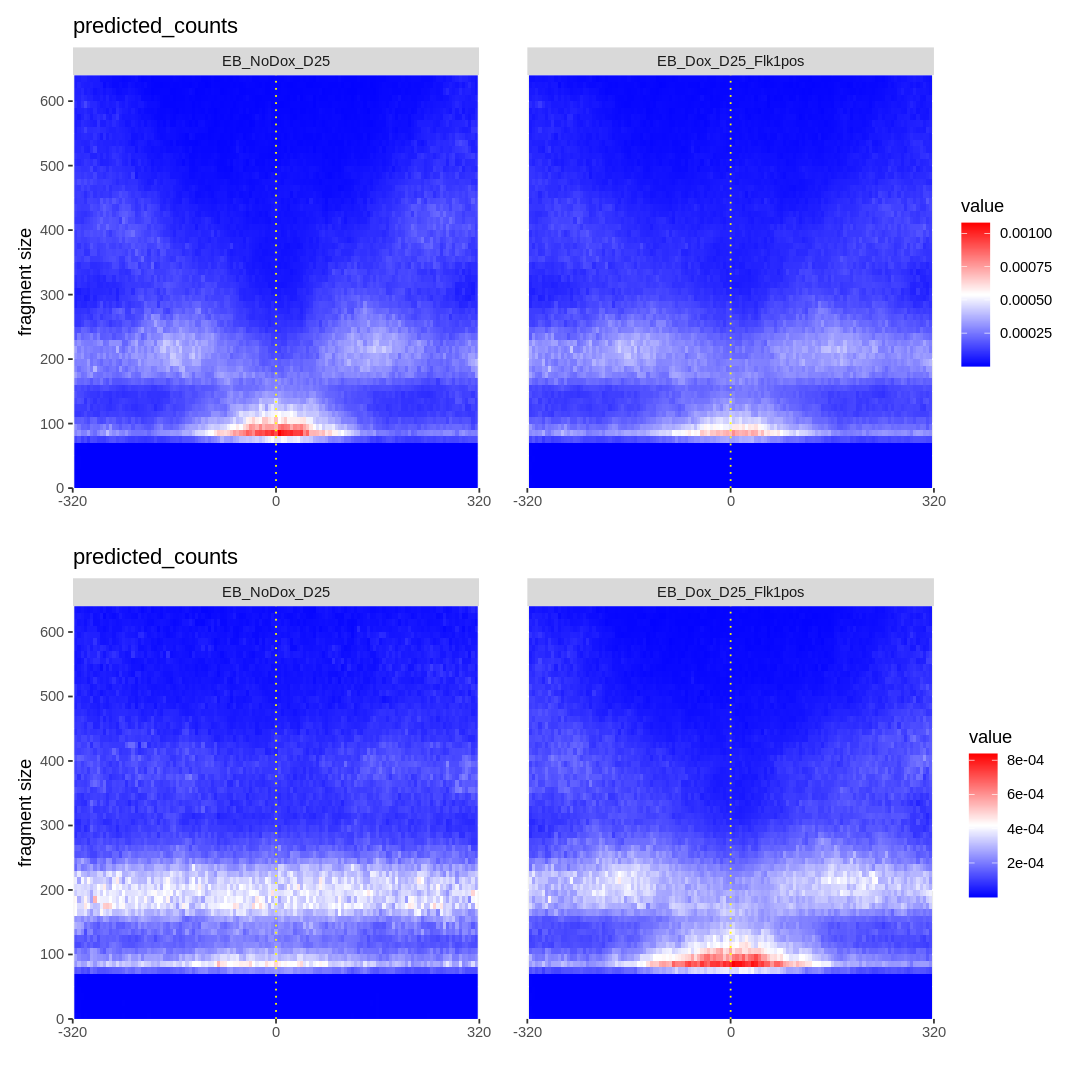

In [ ]:
options(repr.plot.width = 9, repr.plot.height = 9)
i <- res_EB$padj < 0.05 & res_EB$log_ratio > 0.1
table(i)
p1 <- vplot(x_EB[i],  'predicted_counts')
i <- res_EB$padj < 0.05 & res_EB$log_ratio < -0.1
table(i)
p2 <- vplot(x_EB[i], 'predicted_counts')
p1 / p2

i
FALSE  TRUE 
19515  1307 

i
FALSE  TRUE 
16826  3996 

Warning message:
“Removed 128 rows containing missing values (geom_raster).”
Warning message:
“Removed 128 rows containing missing values (geom_raster).”


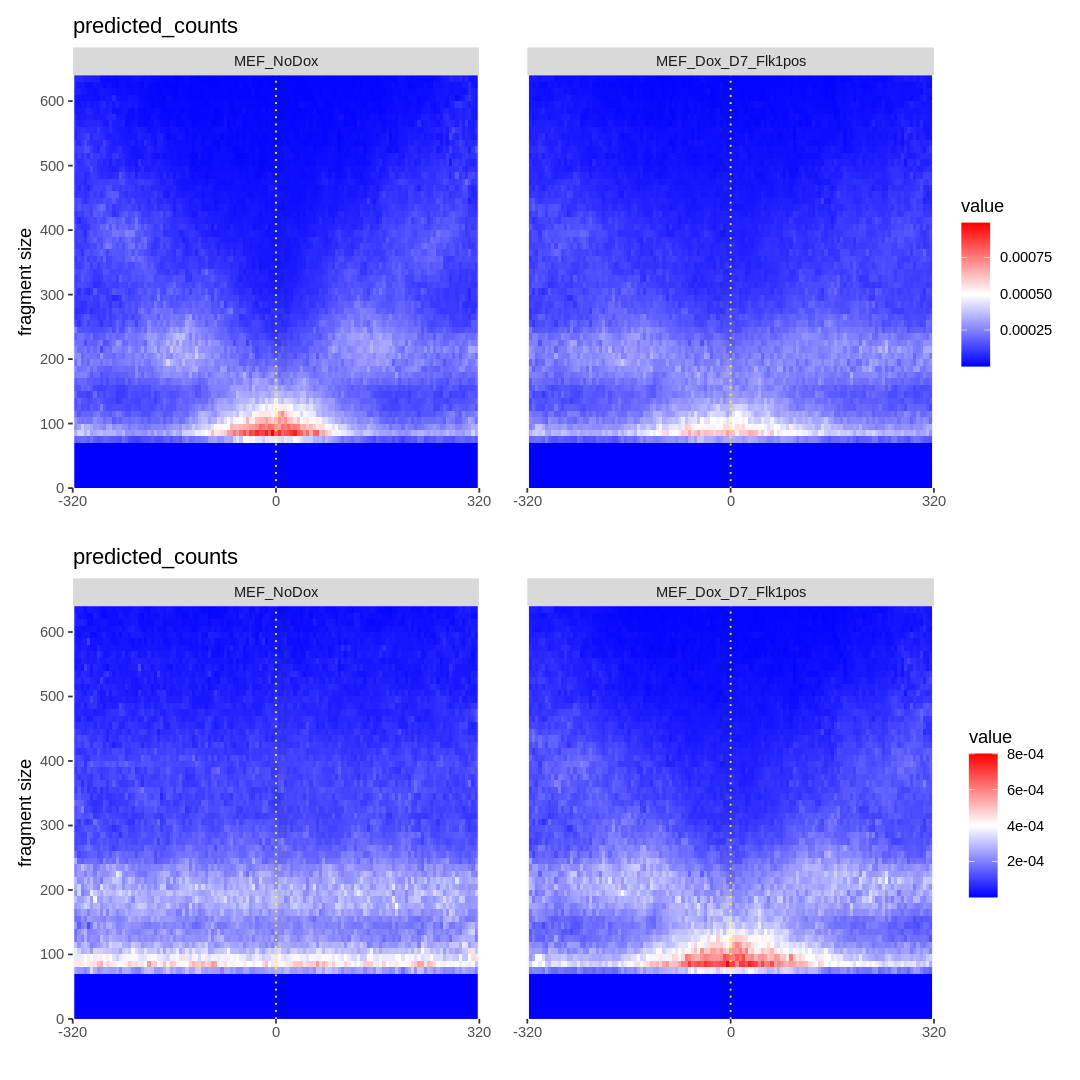

In [ ]:
options(repr.plot.width = 9, repr.plot.height = 9)
i <- res_MEF$padj < 0.05 & res_MEF$log_ratio > 0.1
table(i)
p1 <- vplot(x_MEF[i], 'predicted_counts')
i <- res_MEF$padj < 0.05 & res_MEF$log_ratio < -0.1
table(i)
p2 <- vplot(x_MEF[i], 'predicted_counts')
p1 / p2

### Prepare `noramlizedMatrix` for `EnrichedHeatmap`

In [ ]:
cvg <- list()
for (i in 1:length(local_bw_files)){
  cvg[[names(local_bw_files)[i]]] <- rtracklayer::import(local_bw_files[i], which = res_w)
}

In [ ]:
smooth <- FALSE
extend <- ARGS[['heatmap_window_size']] / 2 - ARGS[['target_width']] / 2
target_ratio <- 1 / (2 * extend  / ARGS[['target_width']] + 1)
sprintf('target_ratio:%.3f', target_ratio) %>% message()

target_ratio:0.050



In [ ]:
is_MEF <- grepl('^MEF_', names(local_bw_files)) | names(local_bw_files) %in% c('MNase', 'H3', 'H3K9me3', 'H3K27me3', 'H3K36me3', 'H3K9ac', 'H3K79me2', 'H3K4me2', 'H3K4me1', 'Hdac1', 'H3.3', 'P300')
is_EB <- grepl('^EB_', names(local_bw_files)) 

In [ ]:
mat <- list()

In [ ]:
mat[['EB']] <- lapply(cvg[is_EB], function(cvgi){
  normalizeToMatrix(
    cvgi,
    resize(res_w[res_w$group == 'EB' & (res_w$NOR_NFR | res_w$NFR_NOR)], fix = 'center', width = ARGS[['target_width']]),
    extend = extend, 
    value_column = 'score', 
    mean_mode = 'w0', 
    w = 10, 
    smooth = smooth, 
    target_ratio = target_ratio
  )
})

In [ ]:
mat[['MEF']] <- lapply(cvg[is_MEF], function(cvgi){
  normalizeToMatrix(
    cvgi,
    resize(res_w[res_w$group == 'MEF' & (res_w$NOR_NFR | res_w$NFR_NOR)], fix = 'center', width = ARGS[['target_width']]),
    extend = extend, 
    value_column = 'score', 
    mean_mode = 'w0', 
    w = 10, 
    smooth = smooth, 
    target_ratio = target_ratio
  )
})

In [ ]:
group_cols <- c(
	'MEF_Dox_D1_Etv2' 									= 'red',
	'MEF_Dox_D7_Etv2' 									= 'red',
	'MEF_NoDox_Brg1' 										= 'purple',
	'MEF_Dox_D1_Brg1' 									= 'purple',
	'MEF_Dox_D7_Brg1' 									= 'purple',
  'MEF_NoDox_H3K27ac' 								= 'green',
  'MEF_Dox_D1_H3K27ac' 								= 'green',
  'MEF_Dox_D7_H3K27ac' 								= 'green',
	'EB_Dox_3h_Etv2' 					= 'red',
	'EB_Dox_12h_Etv2' 					= 'red',
	'EB_Dox_3h_Brg1' =  'purple',
	'EB_Dox_12h_Brg1' = 'purple',
	'EB_NoDox_3h_Brg1' = 'purple',
	'EB_NoDox_12h_Brg1' = 'purple',
	'EB_Dox_3h_H3K27ac' = 'green',
	'EB_Dox_12h_H3K27ac' = 'green',
	'EB_NoDox_3h_H3K27ac' = 'green',
	'EB_NoDox_12h_H3K27ac' = 'green',
	'MNase'                             = 'black',
	'H3'                                = 'black',
	'H3K9me3'                           = 'orange',
	'H3K27me3'                          = 'orange',
	'H3K36me3'                          = 'orange',
	'H3K9ac'                            = 'orange',
	'H3K79me2'                          = 'orange',
	'H3K4me2'                           = 'orange',
	'H3K4me1'                           = 'orange',
	'Hdac1'                             = 'black',
	'H3.3'                              = 'black',
	'P300'                              = 'blue'
)

### EB heatmaps

In [ ]:
col_fun <- lapply(names(mat[['EB']]), function(i) colorRamp2(quantile(mat[['EB']][[i]], c(0.005, 0.995)), c('white', group_cols[i])))
names(col_fun) <- names(mat[['EB']])

In [ ]:
sp <- res_w[res_w$group == 'EB' & (res_w$NOR_NFR | res_w$NFR_NOR)]$NOR_NFR
sp <- factor(sp, c(TRUE, FALSE), labels = c('NOR_NFR', 'NFR_NOR'))
table(sp)

sp
NOR_NFR NFR_NOR 
   3000    1623 

In [ ]:
lgd <- Legend(
  at = c('NOR_NFR', 'NFR_NOR'),
  title = "Clusters", 
  type = "lines", 
  legend_gp = gpar(col = 1:2)
)
ta <- HeatmapAnnotation(
  enriched = anno_enriched(
    gp = gpar(col = 1:2, lty = 1, lwd = 2),
    axis_param = list(facing = 'inside',at = -1000)
  )
)
ht_list <- Heatmap(
  as.character(sp), 
  col = structure(1:2, names = c('NOR_NFR', 'NFR_NOR')),
  name = "partition",
  show_row_names = FALSE, 
  width = unit(3, "mm")
) + 
EnrichedHeatmap(
  mat[['EB']][['EB_Dox_3h_Etv2']],
  col = col_fun[['EB_Dox_3h_Etv2']],
  top_annotation = ta,
  pos_line = TRUE,
  row_order = order(rowMeans(mat[['EB']][['EB_Dox_12h_Etv2']][, 90:110]), decreasing = TRUE),
  name = 'EB_Dox_3h_Etv2'
) + EnrichedHeatmap(
  mat[['EB']][['EB_Dox_12h_Etv2']],
  col = col_fun[['EB_Dox_12h_Etv2']],
  top_annotation = ta,
  pos_line = TRUE,
  name = 'EB_Dox_12h_Etv2'
) + EnrichedHeatmap(
  mat[['EB']][['EB_NoDox_3h_Brg1']],
  col = col_fun[['EB_NoDox_3h_Brg1']],
  top_annotation = ta,
  pos_line = TRUE,
  name = 'EB_NoDox_3h_Brg1'
) + EnrichedHeatmap(
  mat[['EB']][['EB_Dox_12h_Brg1']],
  col = col_fun[['EB_Dox_12h_Brg1']],
  top_annotation = ta,
  pos_line = TRUE,
  name = 'EB_Dox_12h_Brg1'
)+ EnrichedHeatmap(
  mat[['EB']][['EB_NoDox_3h_H3K27ac']],
  col = col_fun[['EB_NoDox_3h_H3K27ac']],
  top_annotation = ta,
  pos_line = TRUE,
  name = 'EB_NoDox_3h_H3K27ac'
) + EnrichedHeatmap(
  mat[['EB']][['EB_Dox_12h_H3K27ac']],
  col = col_fun[['EB_Dox_12h_H3K27ac']],
  top_annotation = ta,
  pos_line = TRUE,
  name = 'EB_Dox_12h_H3K27ac'
)

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly set

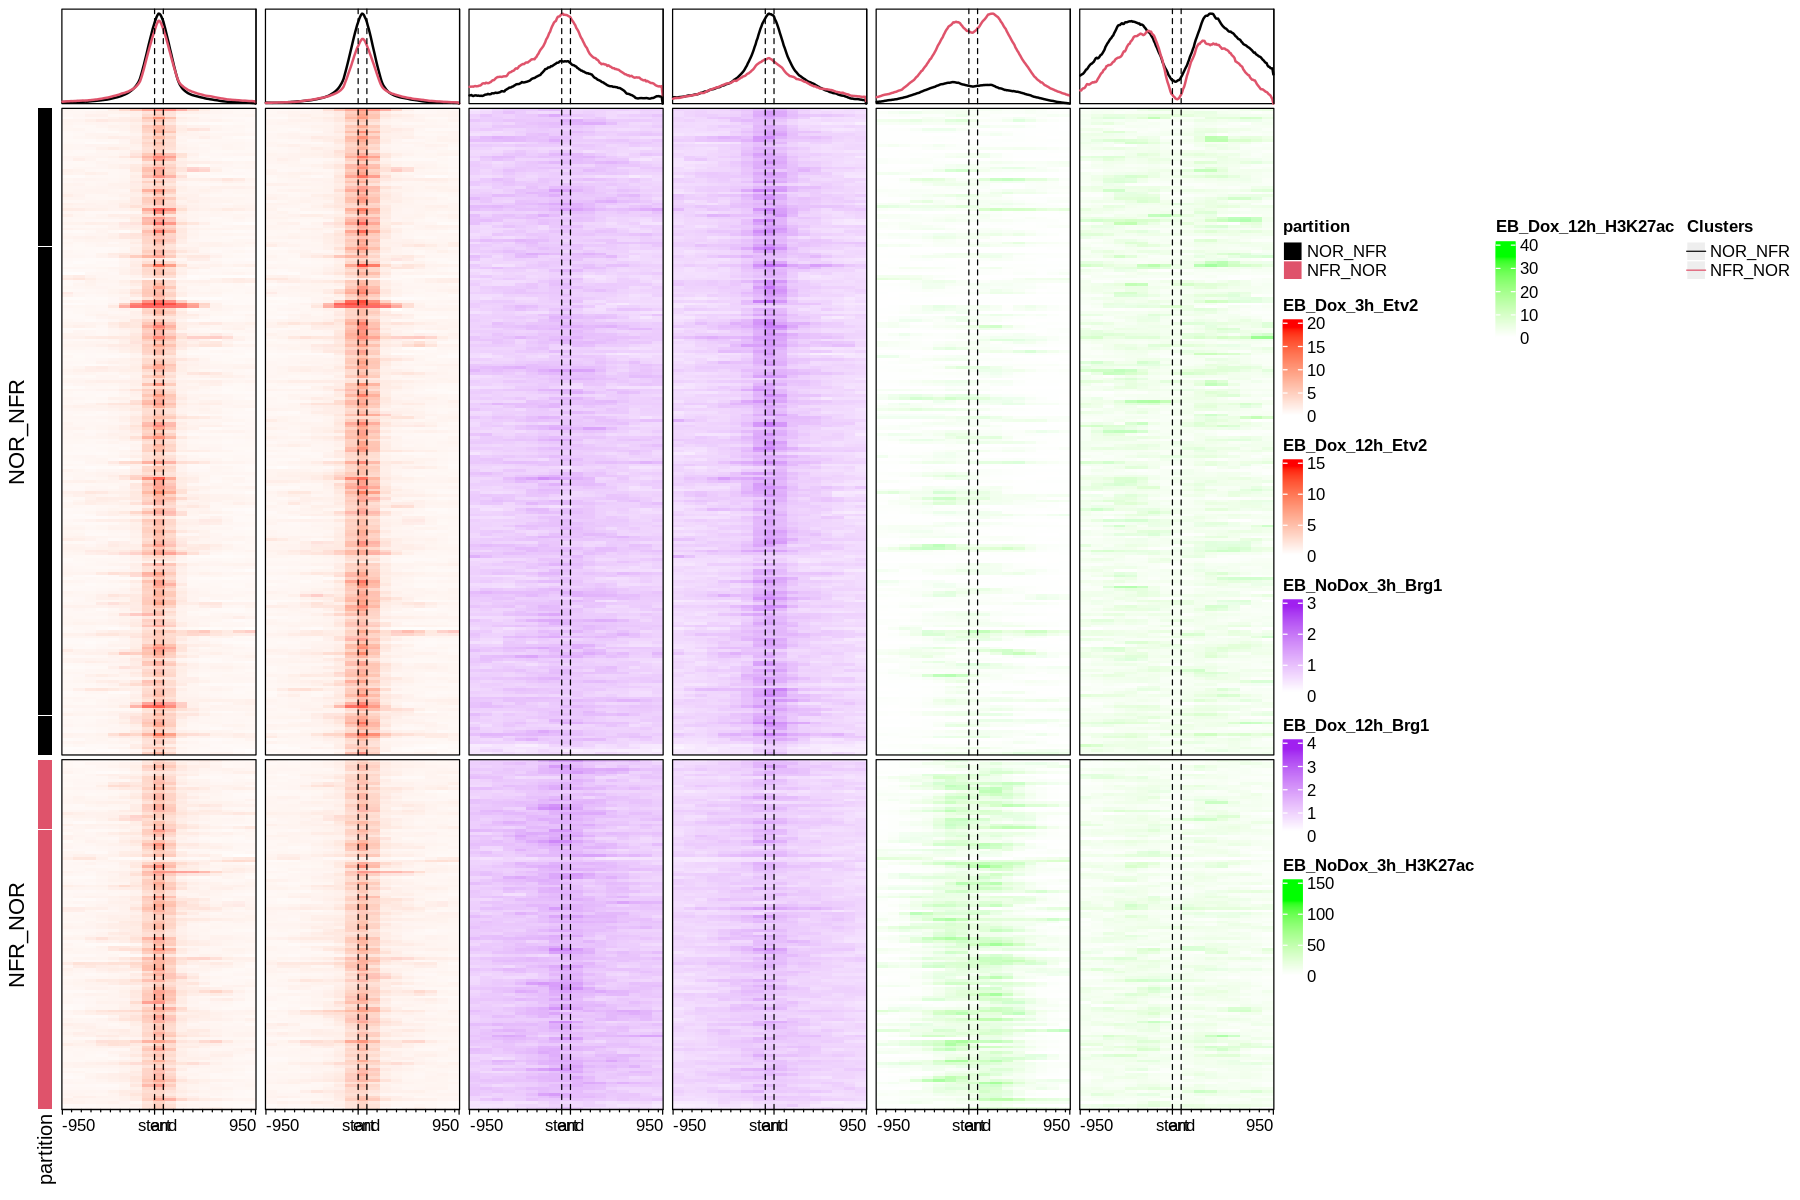

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 10)
draw(ht_list, split = sp, annotation_legend_list = list(lgd))

### MEF heatmaps

In [ ]:
col_fun <- lapply(names(mat[['MEF']]), function(i) colorRamp2(quantile(mat[['MEF']][[i]], c(0.005, 0.995)), c('white', group_cols[i])))
names(col_fun) <- names(mat[['MEF']])

In [ ]:
sp <- res_w[res_w$group == 'MEF' & (res_w$NOR_NFR | res_w$NFR_NOR)]$NOR_NFR
sp <- factor(sp, c(TRUE, FALSE), labels = c('NOR_NFR', 'NFR_NOR'))
table(sp)

sp
NOR_NFR NFR_NOR 
   3996    1307 

In [ ]:
lgd <- Legend(
  at = c('NOR_NFR', 'NFR_NOR'),
  title = "Clusters", 
  type = "lines", 
  legend_gp = gpar(col = 1:2)
)
ta <- HeatmapAnnotation(
  enriched = anno_enriched(
    gp = gpar(col = 1:2, lty = 1, lwd = 2),
    axis_param = list(facing = 'inside',at = -1000)
  )
)
ht_list <- Heatmap(
  as.character(sp), 
  col = structure(1:2, names = c('NOR_NFR', 'NFR_NOR')),
  name = "partition",
  show_row_names = FALSE, 
  width = unit(3, "mm")
) + 
EnrichedHeatmap(
  mat[['MEF']][['MEF_Dox_D1_Etv2']],
  col = col_fun[['MEF_Dox_D1_Etv2']],
  top_annotation = ta,
  pos_line = TRUE,
  row_order = order(rowMeans(mat[['MEF']][['MEF_Dox_D7_Etv2']][, 90:110]), decreasing = TRUE),
  name = 'MEF_Dox_D1_Etv2'
) + EnrichedHeatmap(
  mat[['MEF']][['MEF_Dox_D7_Etv2']],
  col = col_fun[['MEF_Dox_D7_Etv2']],
  top_annotation = ta,
  pos_line = TRUE,
  name = 'MEF_Dox_D7_Etv2'
) + EnrichedHeatmap(
  mat[['MEF']][['MEF_NoDox_Brg1']],
  col = col_fun[['MEF_NoDox_Brg1']],
  top_annotation = ta,
  pos_line = TRUE,
  name = 'MEF_NoDox_Brg1'
) + EnrichedHeatmap(
  mat[['MEF']][['MEF_Dox_D7_Brg1']],
  col = col_fun[['MEF_Dox_D7_Brg1']],
  top_annotation = ta,
  pos_line = TRUE,
  name = 'MEF_Dox_D7_Brg1'
) + EnrichedHeatmap(
  mat[['MEF']][['MEF_NoDox_H3K27ac']],
  col = col_fun[['MEF_NoDox_H3K27ac']],
  top_annotation = ta,
  pos_line = TRUE,
  name = 'MEF_NoDox_H3K27ac'
) + EnrichedHeatmap(
  mat[['MEF']][['MEF_Dox_D7_H3K27ac']],
  col = col_fun[['MEF_Dox_D7_H3K27ac']],
  top_annotation = ta,
  pos_line = TRUE,
  name = 'MEF_Dox_D7_H3K27ac'
) + EnrichedHeatmap(
  mat[['MEF']][['MNase']],
  col = col_fun[['MNase']],
  top_annotation = ta,
  pos_line = TRUE,
  name = 'MNase'
) + EnrichedHeatmap(
  mat[['MEF']][['H3K27me3']],
  col = col_fun[['H3K27me3']],
  top_annotation = ta,
  pos_line = TRUE,
  name = 'H3K27me3'
) + EnrichedHeatmap(
  mat[['MEF']][['H3K36me3']],
  col = col_fun[['H3K36me3']],
  top_annotation = ta,
  pos_line = TRUE,
  name = 'H3K36me3'
) + EnrichedHeatmap(
  mat[['MEF']][['H3K9ac']],
  col = col_fun[['H3K9ac']],
  top_annotation = ta,
  pos_line = TRUE,
  name = 'H3K9ac'
) + EnrichedHeatmap(
  mat[['MEF']][['H3K79me2']],
  col = col_fun[['H3K79me2']],
  top_annotation = ta,
  pos_line = TRUE,
  name = 'H3K79me2'
) + EnrichedHeatmap(
  mat[['MEF']][['H3K4me2']],
  col = col_fun[['H3K4me2']],
  top_annotation = ta,
  pos_line = TRUE,
  name = 'H3K4me2'
) + EnrichedHeatmap(
  mat[['MEF']][['H3K4me1']],
  col = col_fun[['H3K4me1']],
  top_annotation = ta,
  pos_line = TRUE,
  name = 'H3K4me1'
) + EnrichedHeatmap(
  mat[['MEF']][['P300']],
  col = col_fun[['P300']],
  top_annotation = ta,
  pos_line = TRUE,
  name = 'P300'
)

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly set

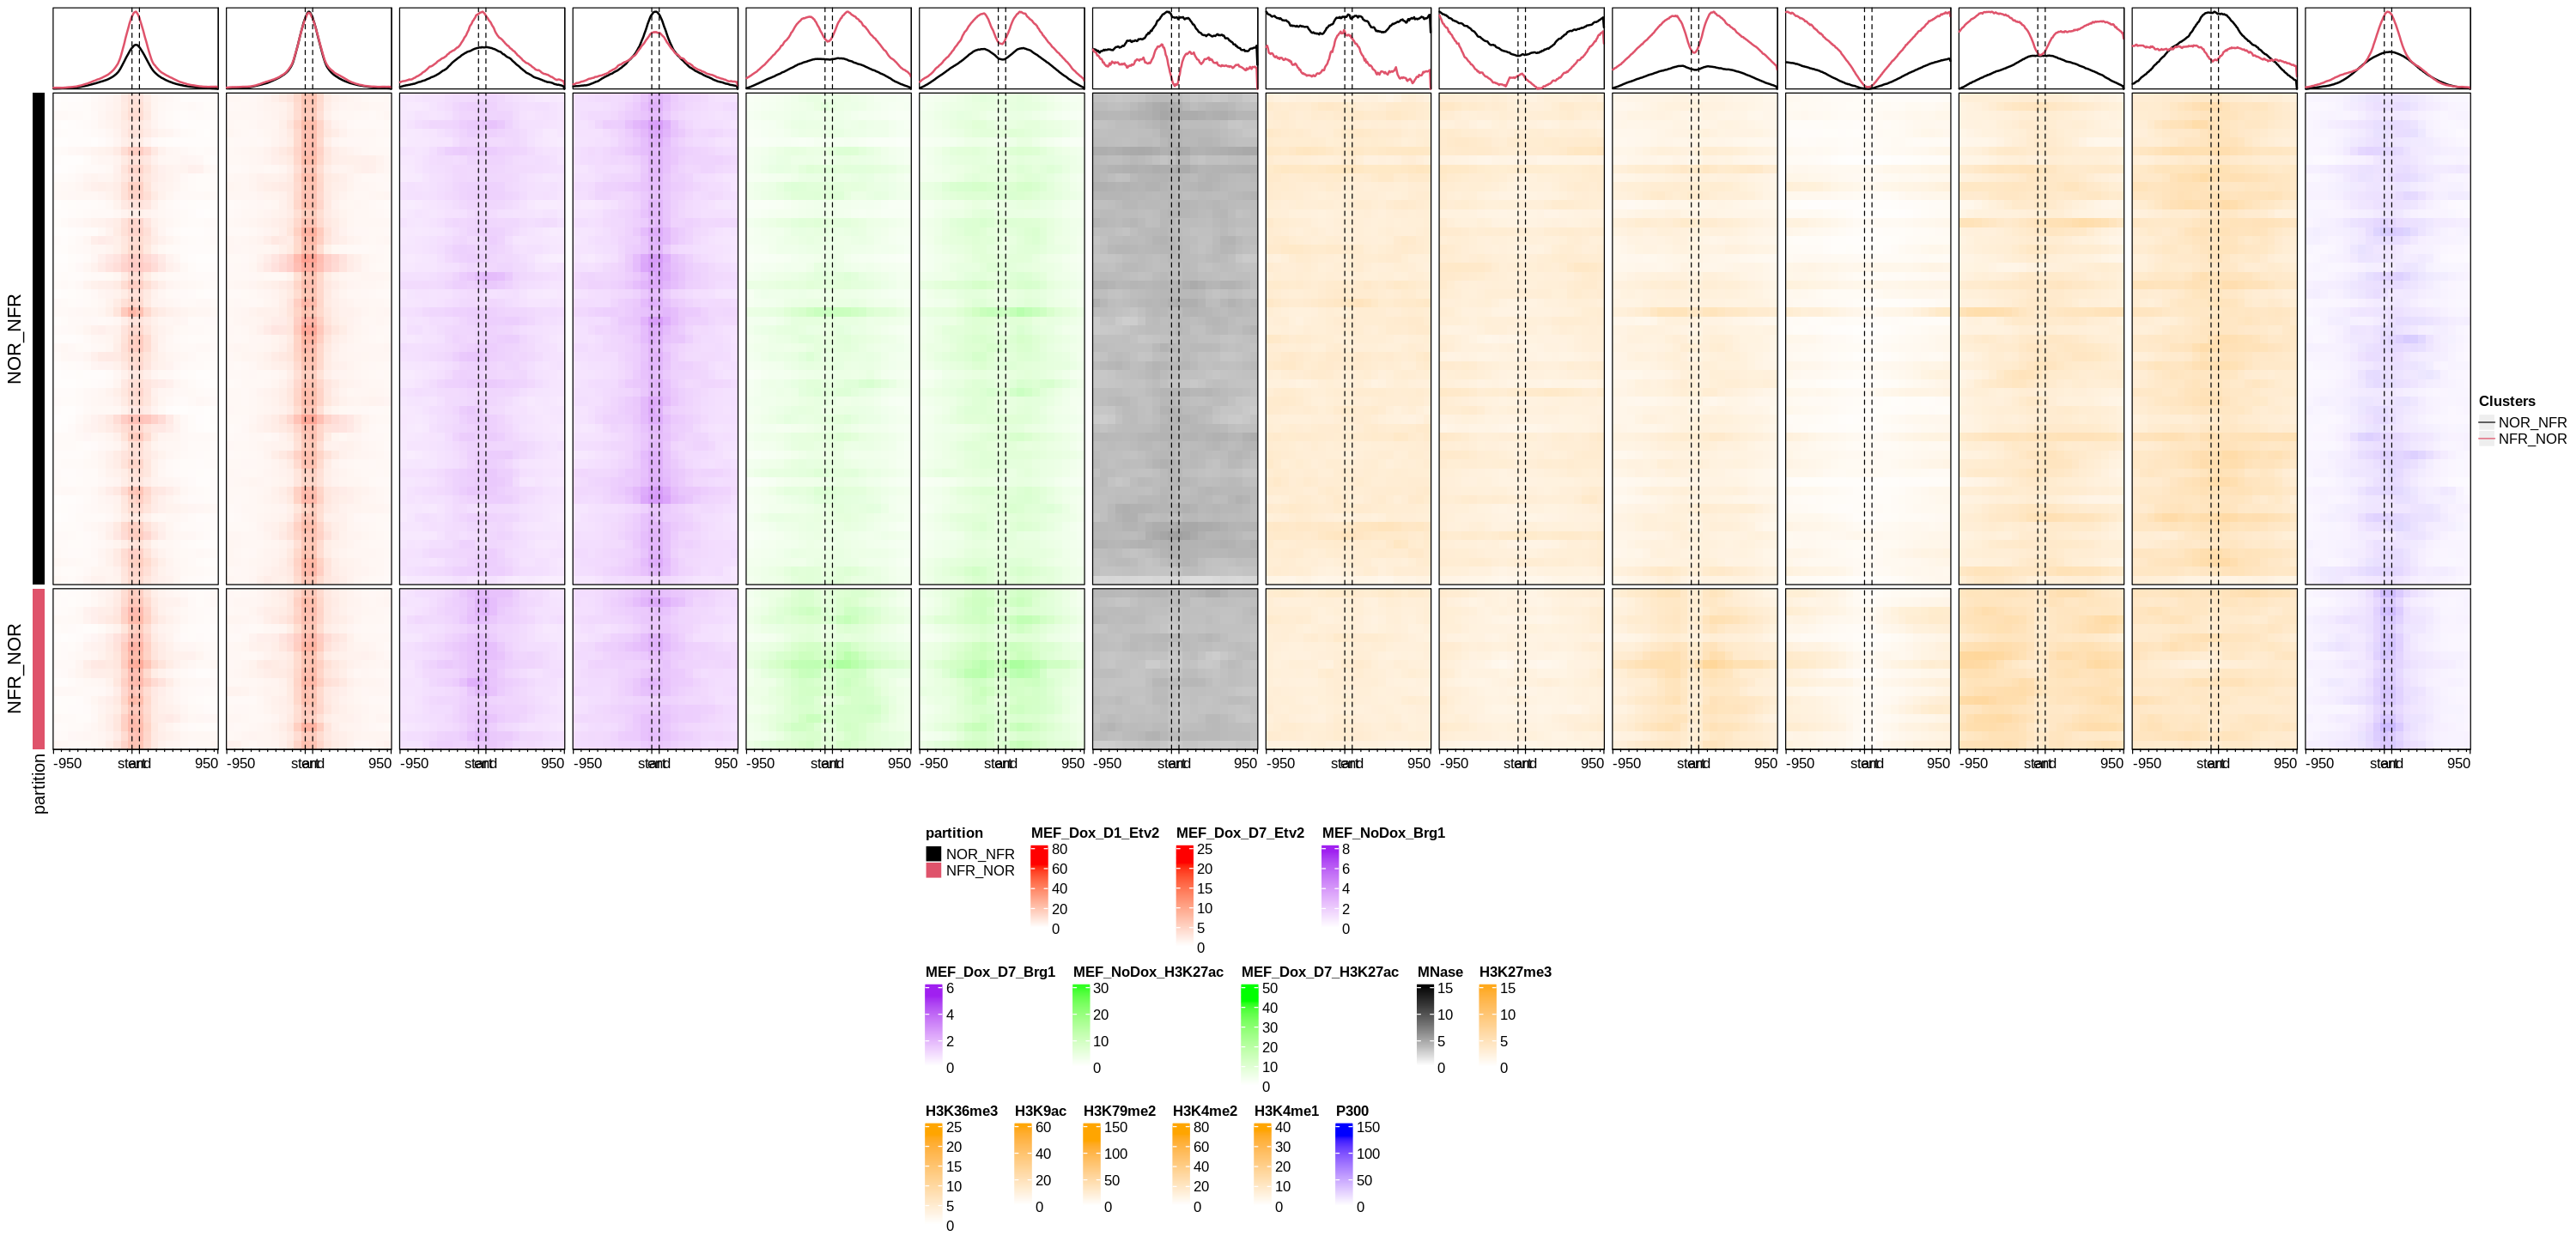

In [ ]:
options(repr.plot.width = 25, repr.plot.height = 12)
draw(ht_list, split = sp, annotation_legend_list = list(lgd), heatmap_legend_side = "bottom")

## Prepare data for pathway analysis

In [ ]:
grl <- list(
  EB_NOR_NFR = granges(res[res$group == 'EB' & res$NOR_NFR]),
  EB_NFR_NOR = granges(res[res$group == 'EB' & res$NFR_NOR]),
  MEF_NOR_NFR = granges(res[res$group == 'MEF' & res$NOR_NFR]),
  MEF_NFR_NOR = granges(res[res$group == 'MEF' & res$NFR_NOR])
)

In [ ]:
pl <- lapply(grl, function(s) annotatePeak(s, tssRegion = c(-2000, 500),TxDb = TxDb.Mmusculus.UCSC.mm10.knownGene,annoDb = 'org.Mm.eg.db'))

>> preparing features information...		 2022-03-29 07:37:37 PM 
>> identifying nearest features...		 2022-03-29 07:37:38 PM 
>> calculating distance from peak to TSS...	 2022-03-29 07:37:38 PM 
>> assigning genomic annotation...		 2022-03-29 07:37:38 PM 
>> adding gene annotation...			 2022-03-29 07:37:53 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-03-29 07:37:54 PM 
>> done...					 2022-03-29 07:37:54 PM 
>> preparing features information...		 2022-03-29 07:37:54 PM 
>> identifying nearest features...		 2022-03-29 07:37:54 PM 
>> calculating distance from peak to TSS...	 2022-03-29 07:37:54 PM 
>> assigning genomic annotation...		 2022-03-29 07:37:54 PM 
>> adding gene annotation...			 2022-03-29 07:37:56 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-03-29 07:37:56 PM 
>> done...					 2022-03-29 07:37:56 PM 
>> preparing features information...		 2022-03-29 07:37:56 PM 
>> identifying nearest features...		 2022-03-29 07:37:56 PM 
>> calculating distance from peak to TSS...	 2022-03-29 07:37:57 PM 
>> assigning genomic annotation...		 2022-03-29 07:37:57 PM 
>> adding gene annotation...			 2022-03-29 07:37:59 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-03-29 07:37:59 PM 
>> done...					 2022-03-29 07:37:59 PM 
>> preparing features information...		 2022-03-29 07:37:59 PM 
>> identifying nearest features...		 2022-03-29 07:37:59 PM 
>> calculating distance from peak to TSS...	 2022-03-29 07:37:59 PM 
>> assigning genomic annotation...		 2022-03-29 07:37:59 PM 
>> adding gene annotation...			 2022-03-29 07:38:01 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-03-29 07:38:01 PM 
>> done...					 2022-03-29 07:38:01 PM 


## Examine the genomic distribution of NOR->NFR and NFR->NOR groups

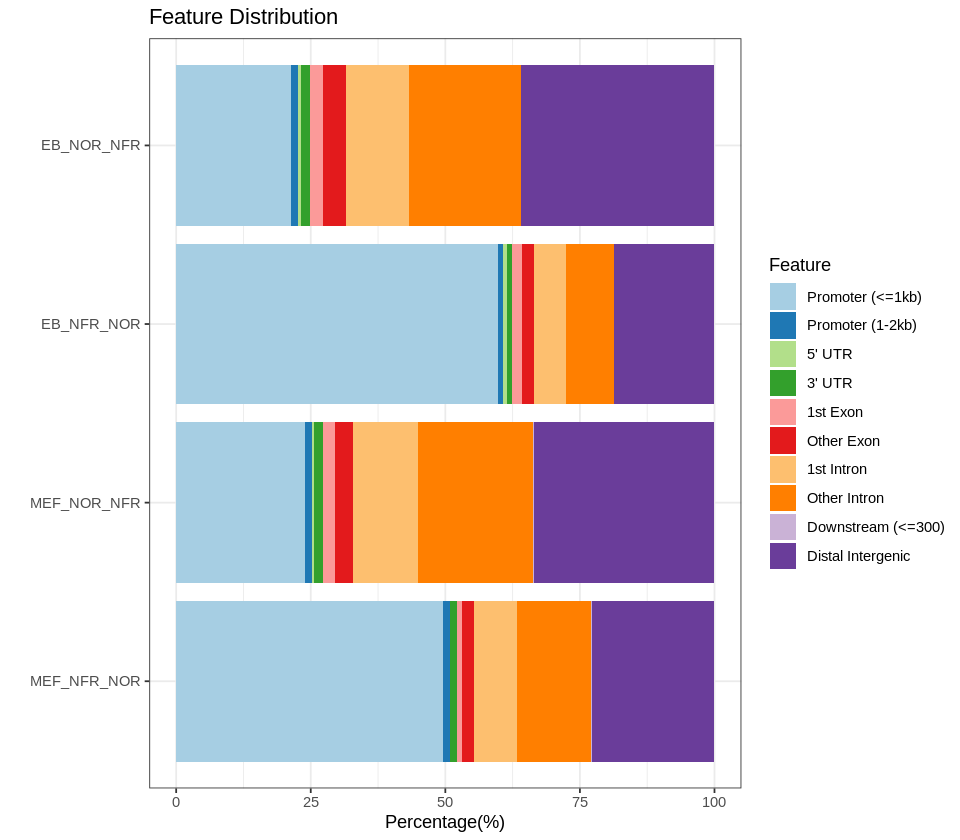

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 7)
plotAnnoBar(pl)

In [ ]:
sp <- lapply(pl, function(xx) unique(as.data.frame(xx)$geneId))
lapply(sp,length)

$EB_NOR_NFR
[1] 1841

$EB_NFR_NOR
[1] 1240

$MEF_NOR_NFR
[1] 2354

$MEF_NFR_NOR
[1] 1016

## SessionInfo

In [ ]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] RColorBrewer_1.1-2                       
 [2] clusterProfiler_4.2.2                    
 [3] ChIPseeker_1.30.3                        
 [4] org.Mm.eg.db_3.14.0                      
 [5] TxDb.Mmusculus.UCSC.mm10.knownGene_3.10.0
 [6] Genomi

In [ ]:
Sys.time() - start_time

Time difference of 2.109956 hours